In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
dta =sm.datasets.fair.load_pandas().data
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [ ]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [ ]:
dta =sm.datasets.fair.load_pandas().data

#add "affair" column: 1 represents having affairs, 0
#represents not 

dta['affair'] = (dta.affairs >0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age +yrs_married + children + religious + educ +occupation + occupation_husb',dta, return_type="dataframe")
y = np.ravel(y)
y = pd.DataFrame(y,columns= ["affair"])
features = X.copy()

In [ ]:
X.head()

,Intercept,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,1.0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,1.0,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,1.0,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,1.0,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,1.0,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [ ]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [ ]:
y['affair'].value_counts()

0.0    4313
1.0    2053
Name: affair, dtype: int64

In [ ]:
X.drop("Intercept",axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
enc = OneHotEncoder(drop='first')

In [ ]:
occup = enc.fit_transform(X[['occupation']])
occup = pd.DataFrame(occup.toarray(),columns=["occup_1","occup_2","occup_3","occup_4","occup_5"])
occup

,occup_1,occup_2,occup_3,occup_4,occup_5
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
6361,0.0,0.0,1.0,0.0,0.0
6362,0.0,0.0,0.0,1.0,0.0
6363,0.0,1.0,0.0,0.0,0.0
6364,0.0,1.0,0.0,0.0,0.0


In [ ]:
occup_husb = enc.fit_transform(X[['occupation_husb']])
occup_husb = pd.DataFrame(occup_husb.toarray(),columns=["occup_husb_1","occup_husb_2","occup_husb_3","occup_husb_4","occup_husb_5"])
occup_husb

,occup_husb_1,occup_husb_2,occup_husb_3,occup_husb_4,occup_husb_5
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...
6361,0.0,1.0,0.0,0.0,0.0
6362,0.0,0.0,0.0,1.0,0.0
6363,0.0,0.0,0.0,0.0,0.0
6364,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.drop("occupation",axis=1,inplace=True)


In [ ]:
X.drop("occupation_husb",axis=1,inplace=True)

In [ ]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ
0,3.0,32.0,9.0,3.0,3.0,17.0
1,3.0,27.0,13.0,3.0,1.0,14.0
2,4.0,22.0,2.5,0.0,1.0,16.0
3,4.0,37.0,16.5,4.0,3.0,16.0
4,5.0,27.0,9.0,1.0,1.0,14.0


In [ ]:
X = pd.concat([X,occup,occup_husb],axis=1)

Since occcupation and occupation_husband was a nominal column, we need to spli into  seperate columns

In [ ]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occup_1,occup_2,occup_3,occup_4,occup_5,occup_husb_1,occup_husb_2,occup_husb_3,occup_husb_4,occup_husb_5
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6366 entries, 0 to 6365
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rate_marriage  6366 non-null   float64
 1   age            6366 non-null   float64
 2   yrs_married    6366 non-null   float64
 3   children       6366 non-null   float64
 4   religious      6366 non-null   float64
 5   educ           6366 non-null   float64
 6   occup_1        6366 non-null   float64
 7   occup_2        6366 non-null   float64
 8   occup_3        6366 non-null   float64
 9   occup_4        6366 non-null   float64
 10  occup_5        6366 non-null   float64
 11  occup_husb_1   6366 non-null   float64
 12  occup_husb_2   6366 non-null   float64
 13  occup_husb_3   6366 non-null   float64
 14  occup_husb_4   6366 non-null   float64
 15  occup_husb_5   6366 non-null   float64
dtypes: float64(16)
memory usage: 845.5 KB


In [ ]:
features.head()

,Intercept,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,1.0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,1.0,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,1.0,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,1.0,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,1.0,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [ ]:
features = features.drop("Intercept",axis=1)

In [ ]:
data= pd.concat([features,y],axis=1)

In [ ]:
data.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1.0


In [ ]:
import seaborn as sns

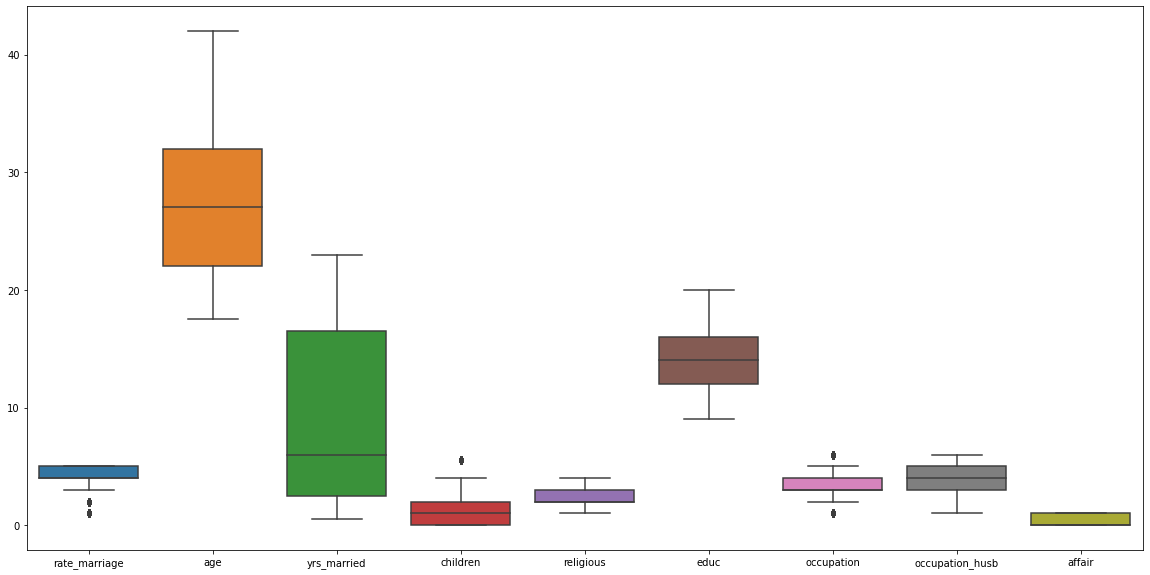

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)

In [ ]:
col = "rate_marriage"
upper = data[col].quantile(0.75)
lower = data[col].quantile(0.25)
iqr = upper - lower 
data_new = data[data[col]>(lower-1.5*iqr)]

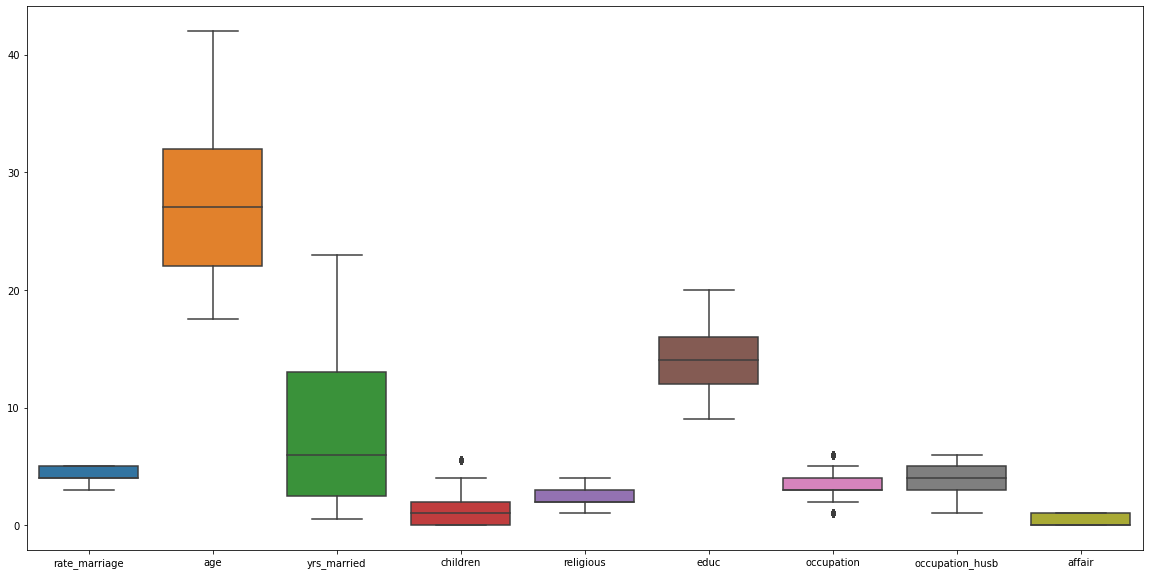

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_new)

In [ ]:
col = "children"
upper = data_new[col].quantile(0.75)
lower = data_new[col].quantile(0.25)
iqr = upper - lower 
data_new = data_new[data_new[col]<(upper+1.5*iqr)]

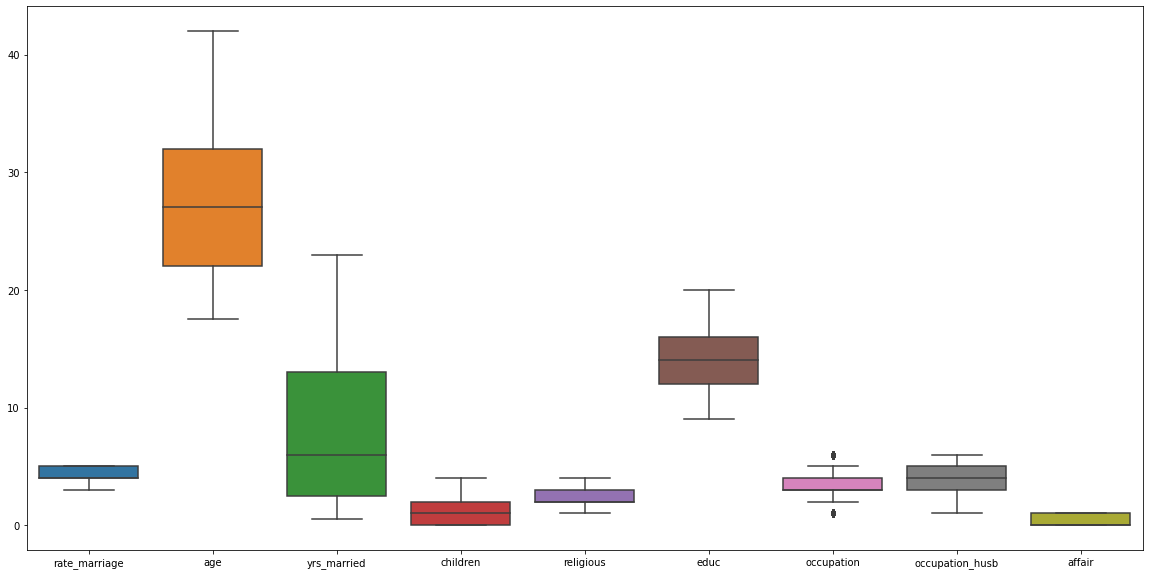

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data_new)

In [ ]:
data_new.shape
data_new.reset_index(inplace=True,drop=True)

In [ ]:
data_new.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1.0


All the outliers have been removed

In [ ]:
features = data_new.drop("affair",axis=1)
target = data_new['affair']

In [ ]:
features.shape

(5741, 8)

In [ ]:
target.shape

(5741,)

Now lets check the vif

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()
scaled = sc.fit_transform(features)
X_scaled = pd.DataFrame(scaled,columns= features.columns)

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_scaled.columns
vif['vif'] = [variance_inflation_factor(X_scaled.values,i) for i in range(X_scaled.shape[1])]


In [ ]:
vif.sort_values('vif',ascending=False)

,features,vif
2,yrs_married,6.825911
1,age,5.113250
3,children,2.472520
5,educ,1.302025
6,occupation,1.212750
7,occupation_husb,1.083005
4,religious,1.032012
0,rate_marriage,1.024339


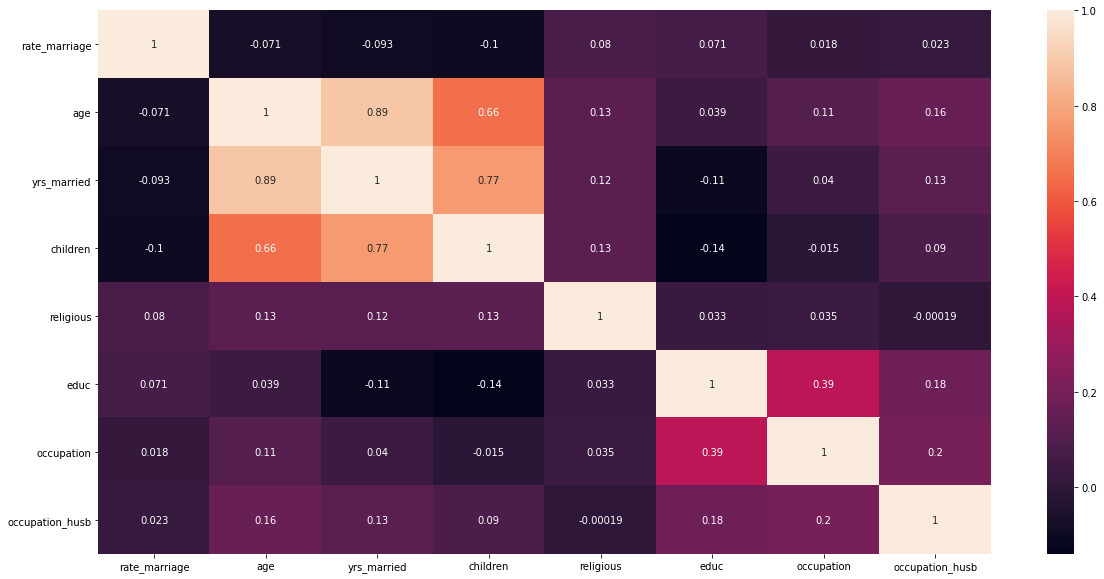

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(X_scaled.corr(),annot=True)

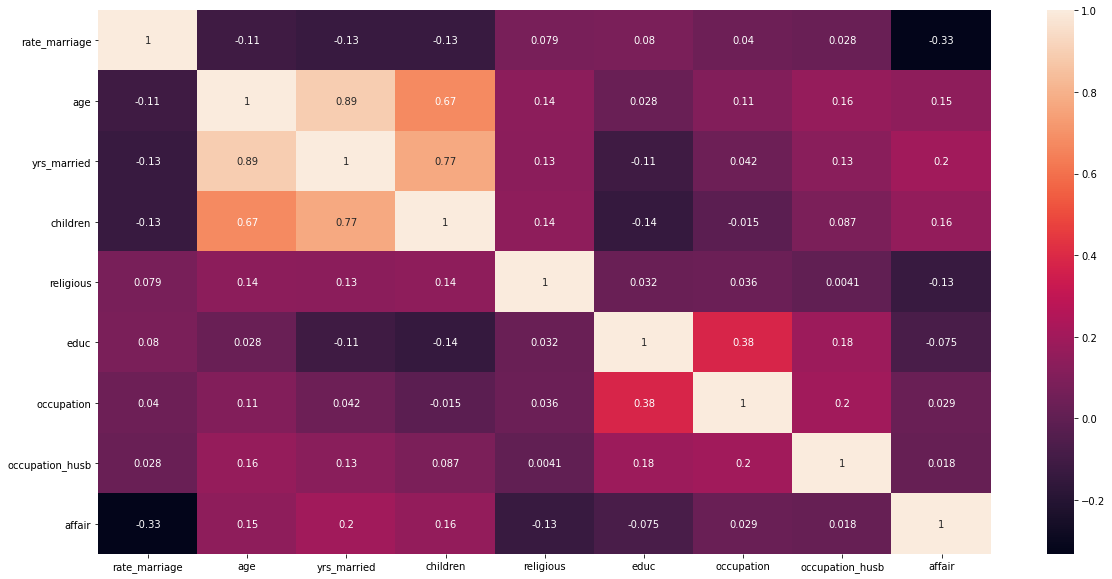

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

yrs_married and age have very high correlation.First lets try the score before manipulating the columns.Then lets see the score after manipulation

In [ ]:
features.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [ ]:
target.head()


0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: affair, dtype: float64

In [ ]:
enc = OneHotEncoder(drop='first')

In [ ]:
def encodeColumns(x):
  occup = enc.fit_transform(x[['occupation']])
  occup = pd.DataFrame(occup.toarray(),columns=["occup_1","occup_2","occup_3","occup_4","occup_5"])
  occup_husb = enc.fit_transform(x[['occupation_husb']])
  occup_husb = pd.DataFrame(occup_husb.toarray(),columns=["occup_husb_1","occup_husb_2","occup_husb_3","occup_husb_4","occup_husb_5"])
  x.drop("occupation",axis=1,inplace=True)
  x.drop("occupation_husb",axis=1,inplace=True)
  #occup.reset_index(inplace=True)
  #occup_husb.reset_index(inplace=True)
  #x.reset_index(inplace=True)
  print(x.shape)
  print(occup.shape)
  print(occup_husb.shape)
  x = pd.concat([x,occup,occup_husb],axis=1)
  return x
  


In [ ]:
features.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


In [ ]:
#features.reset_index(inplace=True,drop=True)
features_1=features.copy()


In [ ]:
features_1.shape

(5741, 8)

In [ ]:
features_1 = encodeColumns(features_1)

(5741, 6)
(5741, 5)
(5741, 5)


In [ ]:
features_1.shape

(5741, 16)

In [ ]:
features_1.head()

,rate_marriage,age,yrs_married,children,religious,educ,occup_1,occup_2,occup_3,occup_4,occup_5,occup_husb_1,occup_husb_2,occup_husb_3,occup_husb_4,occup_husb_5
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
target.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: affair, dtype: float64

As seen above,the remaing step is to apply scaling and run logistic regression

**Logistic regression without handling multicollinearity**(i.e taking care of yrs_married and age)

In [ ]:
sc = StandardScaler()
scaled = sc.fit_transform(features_1)
features_scaled = pd.DataFrame(scaled,columns= features_1.columns)

In [ ]:
features_scaled.head()

,rate_marriage,age,yrs_married,children,religious,educ,occup_1,occup_2,occup_3,occup_4,occup_5,occup_husb_1,occup_husb_2,occup_husb_3,occup_husb_4,occup_husb_5
0,-1.754407,0.513474,0.077691,1.420023,0.657582,1.263833,2.581644,-0.879520,-0.645083,-0.360719,-0.13382,-0.502666,-0.286682,-0.688159,1.615764,-0.305135
1,-1.754407,-0.242619,0.649795,1.420023,-1.616622,-0.117497,-0.387350,1.136984,-0.645083,-0.360719,-0.13382,-0.502666,-0.286682,1.453153,-0.618902,-0.305135
2,-0.390924,-0.998712,-0.851977,-0.991440,-1.616622,0.803390,-0.387350,1.136984,-0.645083,-0.360719,-0.13382,-0.502666,-0.286682,-0.688159,1.615764,-0.305135
3,-0.390924,1.269568,1.150385,2.223844,0.657582,0.803390,-0.387350,-0.879520,-0.645083,2.772242,-0.13382,-0.502666,-0.286682,-0.688159,1.615764,-0.305135
4,0.972559,-0.242619,0.077691,-0.187619,-1.616622,-0.117497,-0.387350,1.136984,-0.645083,-0.360719,-0.13382,-0.502666,-0.286682,1.453153,-0.618902,-0.305135


Our data is scaled,Now lets perform logistic regression

In [ ]:
features_scaled.shape


(5741, 16)

In [ ]:
target.shape

(5741,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features_scaled,target, test_size= 0.25, random_state = 355)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,precision_score,confusion_matrix,classification_report,roc_curve

In [ ]:
accuracy_score(y_test,y_pred)

0.7311977715877437

In [ ]:
recall_score(y_test,y_pred)

0.28746928746928746

In [ ]:
precision_score(y_test,y_pred)

0.5492957746478874

In [ ]:
confusion_matrix(y_test,y_pred)

array([[933,  96],
       [290, 117]])

In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.76      0.91      0.83      1029\n         1.0       0.55      0.29      0.38       407\n\n    accuracy                           0.73      1436\n   macro avg       0.66      0.60      0.60      1436\nweighted avg       0.70      0.73      0.70      1436\n'

In [ ]:
roc_auc_score(y_test,y_pred)

0.597087413413944

In [ ]:
def get_scores(y_test,y_pred):
  print("accuracy score:",accuracy_score(y_test,y_pred)) 
  print("recall score:",recall_score(y_test,y_pred))
  print("precision_score:",precision_score(y_test,y_pred))
  print("roc_auc_score:",roc_auc_score(y_test,y_pred))
  

In [ ]:
get_scores(y_test,y_pred)

accuracy score: 0.7311977715877437
recall score: 0.28746928746928746
precision_score: 0.5492957746478874
roc_auc_score: 0.597087413413944


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

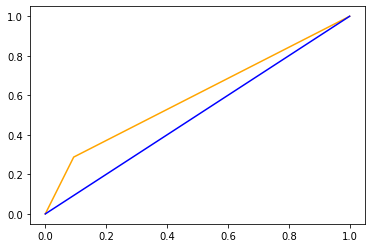

In [ ]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1],color="blue")

Now lets take care of multicollinearity and try the same


In [ ]:
features_scaled.head()

,rate_marriage,age,yrs_married,children,religious,educ,occup_1,occup_2,occup_3,occup_4,occup_5,occup_husb_1,occup_husb_2,occup_husb_3,occup_husb_4,occup_husb_5
0,-1.754407,0.513474,0.077691,1.420023,0.657582,1.263833,2.581644,-0.879520,-0.645083,-0.360719,-0.13382,-0.502666,-0.286682,-0.688159,1.615764,-0.305135
1,-1.754407,-0.242619,0.649795,1.420023,-1.616622,-0.117497,-0.387350,1.136984,-0.645083,-0.360719,-0.13382,-0.502666,-0.286682,1.453153,-0.618902,-0.305135
2,-0.390924,-0.998712,-0.851977,-0.991440,-1.616622,0.803390,-0.387350,1.136984,-0.645083,-0.360719,-0.13382,-0.502666,-0.286682,-0.688159,1.615764,-0.305135
3,-0.390924,1.269568,1.150385,2.223844,0.657582,0.803390,-0.387350,-0.879520,-0.645083,2.772242,-0.13382,-0.502666,-0.286682,-0.688159,1.615764,-0.305135
4,0.972559,-0.242619,0.077691,-0.187619,-1.616622,-0.117497,-0.387350,1.136984,-0.645083,-0.360719,-0.13382,-0.502666,-0.286682,1.453153,-0.618902,-0.305135


Age and yrs_married are highly collinear


Age is less correlated to output affairs column.So lets remove it


In [ ]:
features_scaled.drop("age",axis=1,inplace=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(features_scaled,target, test_size= 0.25, random_state = 355)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics impoget_scores(y_test,y_pred)rt accuracy_score,recall_score,roc_auc_score,precision_score,confusion_matrix,classification_report,roc_curve

In [ ]:
get_scores(y_test,y_pred)

accuracy score: 0.7325905292479109
recall score: 0.2800982800982801
precision_score: 0.5560975609756098
roc_auc_score: 0.5958314529743101


You can see above,how the scores have changed after we removed one column